In [5]:
# 1. Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [ ]:
#Étape 1 :  Initialisation et Chargement des Données

In [6]:
# 2. Charger le jeu de données
housing = fetch_california_housing(as_frame=True)

In [7]:
# 3. Créer un DataFrame complet (X = Caractéristiques, y = Cible)
df = housing.frame
df['MedHouseVal'] = housing.target # Ajoutez la variable cible au DataFrame pour l'EDA

In [ ]:
# Étape 2 : Exploration et Compréhension des Données (EDA de Base)

In [8]:
# 1. Aperçu des premières lignes
print("--- Tête du DataFrame ---")
print(df.head())

# 2. Informations générales (types de données, non-nulles)
print("\n--- Informations sur les Données ---")
df.info()
# ->pas de valeur manquante ou null
# 3. Statistiques descriptives de base
print("\n--- Statistiques Descriptives ---")
print(df.describe())
# Pas de valeur hors norme

--- Tête du DataFrame ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- Informations sur les Données ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  f

In [ ]:
# Étape 3 : Visualisation de la Cible et des Corrélations

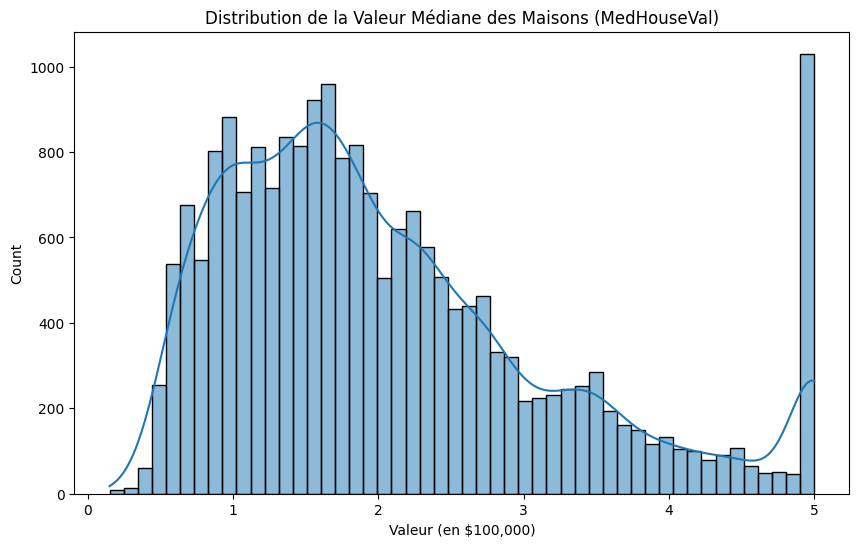

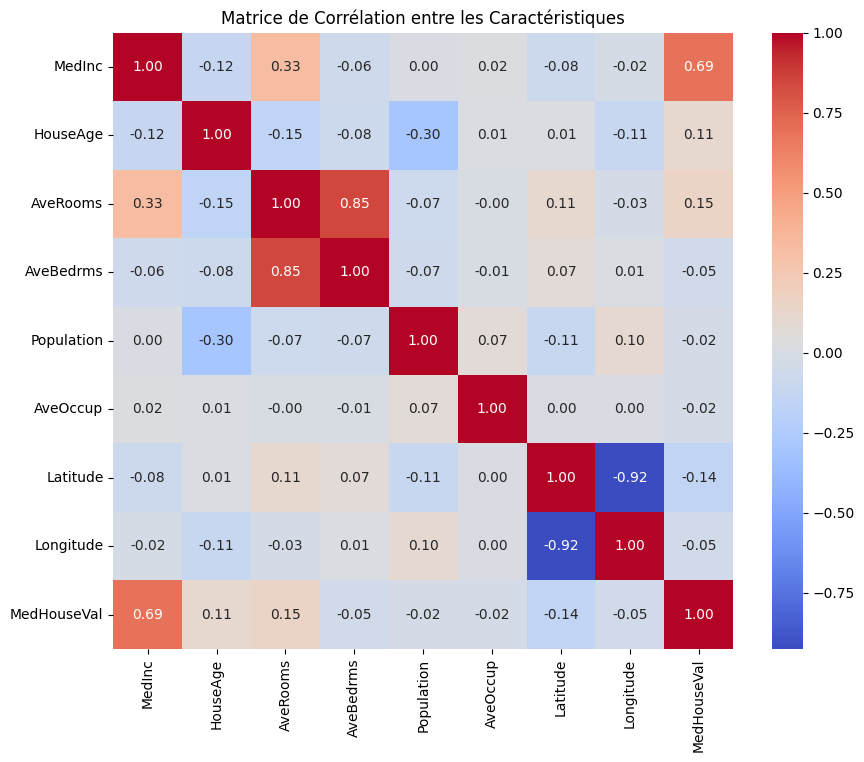

In [10]:
# Un peu de visualisation
# 1. Distribution de la variable cible (MedHouseVal)
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=50)
plt.title("Distribution de la Valeur Médiane des Maisons (MedHouseVal)")
plt.xlabel("Valeur (en $100,000)")
plt.show()
# longue queue à droite (skewness) ou des pics (comme un pic à 5.0), indiquant des données plafonnées qui pourraient nécessiter une transformation (logarithme) ou une attention particulière.
# 2. Matrice de Corrélation
plt.figure(figsize=(10, 8))
# Utilisez .corr() et visualisez avec une heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation entre les Caractéristiques")
plt.show()
# Les gens riches achètent des grosses maisons

In [ ]:
# Étape 4 :  Préparation des Données pour l'Entraînement

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Séparation X (Caractéristiques) et y (Cible)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# 2. Séparation des jeux d'entraînement et de test (standard 80/20)
# 'random_state' garantit que les résultats sont reproductibles
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Normalisation/Standardisation des données
scaler = StandardScaler()

# Appliquer le fit uniquement sur les données d'entraînement pour éviter le Data Leakage
X_train_scaled = scaler.fit_transform(X_train)

# Appliquer la transformation sur les données de test
X_test_scaled = scaler.transform(X_test)

# Note perso :
#train_test_split est crucial : le modèle n'apprend que sur les données d'entraînement (X_train/y_train) et est évalué sur les données de test (X_test/y_test), simulant des données "nouvelles".
#StandardScaler est nécessaire pour la Régression Linéaire, car elle met toutes les caractéristiques à la même échelle (moyenne $\mu=0$ et écart-type $\sigma=1$), 
#ce qui empêche les caractéristiques avec de grandes valeurs (comme le revenu) de dominer le modèle. C'est essentiel pour l'IA/ML.

In [ ]:
#Étape 5 :  Entraînement du Modèle de Régression Linéaire

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Instanciation du modèle
model = LinearRegression()

# 2. Entraînement du modèle (FIT)
model.fit(X_train_scaled, y_train)

# 3. Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_scaled)

# 4. Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erreur Quadratique Moyenne (MSE): {mse:.2f}")
print(f"Racine de l'Erreur Quadratique Moyenne (RMSE): {rmse:.2f}")
print(f"Coefficient de Détermination (R^2): {r2:.3f}")

Erreur Quadratique Moyenne (MSE): 0.56
Racine de l'Erreur Quadratique Moyenne (RMSE): 0.75
Coefficient de Détermination (R^2): 0.576


In [ ]:
#Note : 
#Réalisation le cycle complet : Instancier -> Entraîner (.fit()) -> Prédire (.predict()) -> Évaluer.
#Le R^2  indique la proportion de la variance de la cible qui est expliquée par les caractéristiques. 
#Un R^2 de 1.0 est parfait, 0.0 indique que le modèle ne fait pas mieux qu'une simple moyenne.
# Ici R2 = 0.576, par terrible

In [ ]:
#6.  Amélioration du Modèle : La Régularisation

In [ ]:
#Le modèle de Régression Linéaire est simple et peut être sujet au surapprentissage (overfitting) si les données sont bruitées. La régularisation est une technique standard pour contrer cela.
#La Régression Ridge ajoute une pénalité aux coefficients du modèle, ce qui les empêche de devenir trop grands.

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Définir l'espace de recherche des hyperparamètres (l'alpha est le paramètre de régularisation)
# Nous testons différentes forces de pénalité (faible à forte)
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Utiliser GridSearchCV pour tester automatiquement chaque alpha et trouver le meilleur
# 'neg_mean_squared_error' est utilisé car le score est maximisé (l'erreur est minimisée)
ridge_model = Ridge()
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, # Cross-Validation sur 5 plis (plus robuste)
    n_jobs=-1
)

# Entraînement avec la recherche du meilleur paramètre
grid_search.fit(X_train_scaled, y_train)

# Récupérer le meilleur modèle et son alpha
best_ridge = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Évaluation du modèle Ridge optimal
y_pred_ridge = best_ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Meilleur Alpha pour Ridge : {best_alpha}")
print(f"R^2 avec Régression Ridge : {r2_ridge:.3f}")

Meilleur Alpha pour Ridge : 0.1
R^2 avec Régression Ridge : 0.576


In [ ]:
#Pas mieux, autre technique

In [ ]:
#7.  Entraînement avec un Modèle à Base d'Arbres

In [ ]:
#Les modèles linéaires font des hypothèses fortes sur les données. Un modèle à base d'arbres comme le Random Forest capture les relations non linéaires et est souvent plus performant.

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Instanciation du modèle (paramètres par défaut pour l'instant)
# n_estimators est le nombre d'arbres
forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entraînement sur les données d'entraînement (pas besoin d'échelle pour les arbres !)
# Les modèles à base d'arbre ne nécessitent pas la normalisation des caractéristiques
forest_model.fit(X_train, y_train) # Note: on utilise X_train non-scalé

# Prédiction et évaluation
y_pred_forest = forest_model.predict(X_test)
r2_forest = r2_score(y_test, y_pred_forest)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))

print(f"R^2 avec Random Forest : {r2_forest:.3f}")
print(f"RMSE avec Random Forest : {rmse_forest:.2f}")

R^2 avec Random Forest : 0.805
RMSE avec Random Forest : 0.51


In [ ]:
#R2 :excellent

In [ ]:
#8.  Interprétation des Résultats

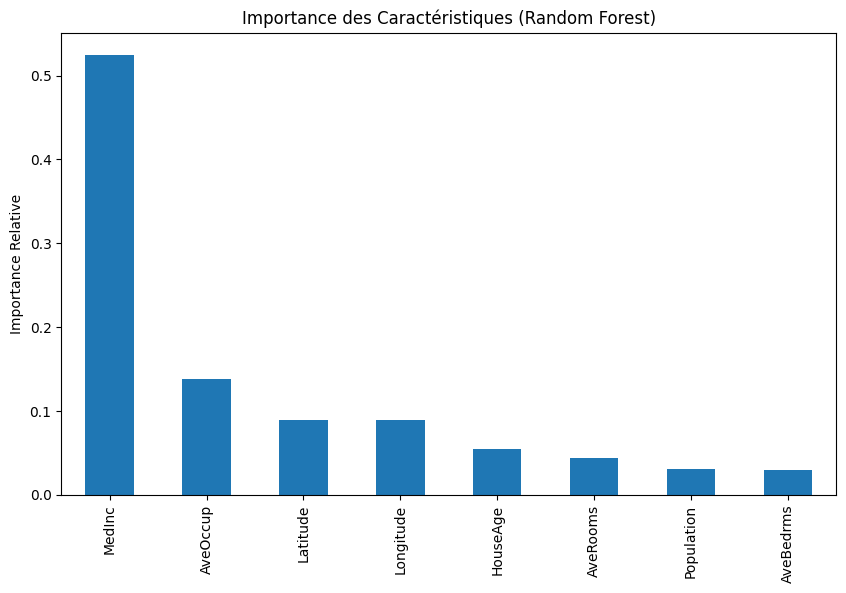


--- Caractéristiques les Plus Importantes ---
MedInc      0.524871
AveOccup    0.138443
Latitude    0.088936
dtype: float64


In [21]:
# Obtenir l'importance des caractéristiques du modèle Random Forest
feature_importances = pd.Series(forest_model.feature_importances_, index=X.columns)

# Trier et afficher
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Importance des Caractéristiques (Random Forest)")
plt.ylabel("Importance Relative")
plt.show()

print("\n--- Caractéristiques les Plus Importantes ---")
print(feature_importances.sort_values(ascending=False).head(3))

In [ ]:
# Conclusion  : "Le prix de la maison est principalement/beaucoup déterminé par le revenu médian du district, suivi par le nb moy d'occupant ...".

In [ ]:
#Analyse où le modèle se trompe.

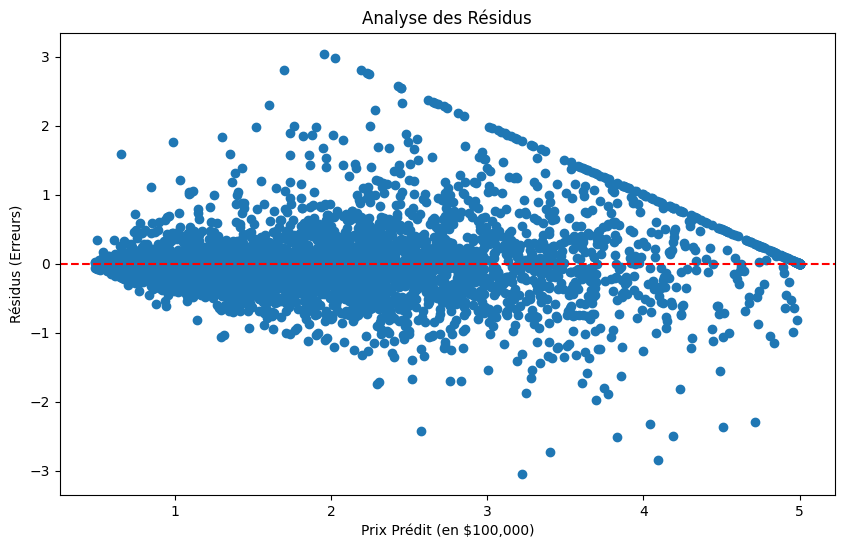

In [22]:
# Calculer les résidus (erreurs de prédiction)
residuals = y_test - y_pred_forest

# Nuage de points des prédictions vs. erreurs (résidus)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_forest, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prix Prédit (en $100,000)")
plt.ylabel("Résidus (Erreurs)")
plt.title("Analyse des Résidus")
plt.show()

In [ ]:
# des erreurs sur les prix les plus élevés.

In [23]:
import joblib
import os

# Créer le dossier de sauvegarde si non existant
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Sauvegarder le meilleur modèle (ici, le Random Forest)
joblib.dump(forest_model, 'saved_models/final_regression_model.pkl')

print("Modèle Random Forest sauvegardé dans 'saved_models/final_regression_model.pkl'.")

Modèle Random Forest sauvegardé dans 'saved_models/final_regression_model.pkl'.
